In [9]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from numpy.polynomial import chebyshev
from cycler import cycler

from pdswe import PDSWE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Basic case (components and ampl/phase)

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          7.68e-02       1.68e-32         1000            320      
       2          8.40e-04       3.17e-32         1320            537      
       3          1.52e-04       4.91e-26         1857            694      
       4          1.36e-05       7.22e-26         2551            729      
       5          1.15e-06       2.86e-28         3280            272      
       6          4.32e-07       7.50e-31         3552            12       
       7          1.00e-07       5.08e-33         3564             0       
Solved in 7 iterations, number of nodes 3564. 
Maximum relative residual: 1.00e-07 
Maximum boundary residual: 5.08e-33


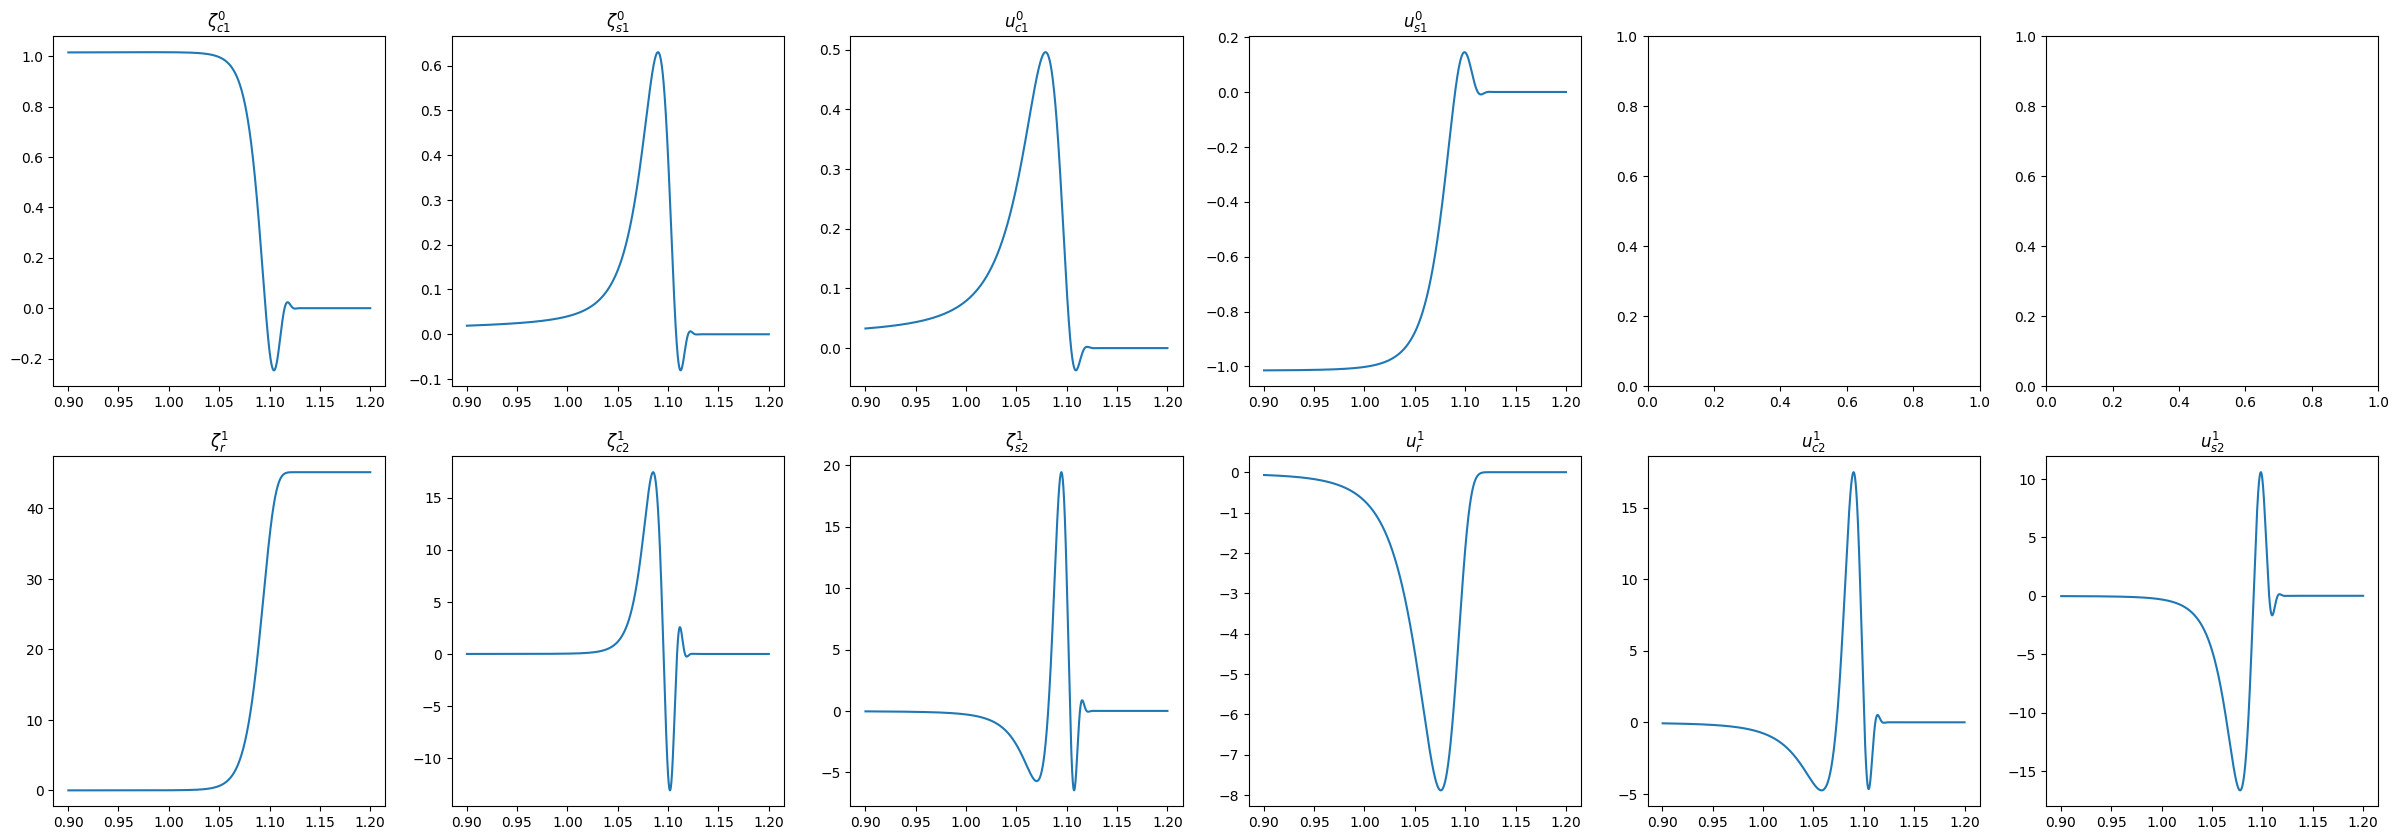

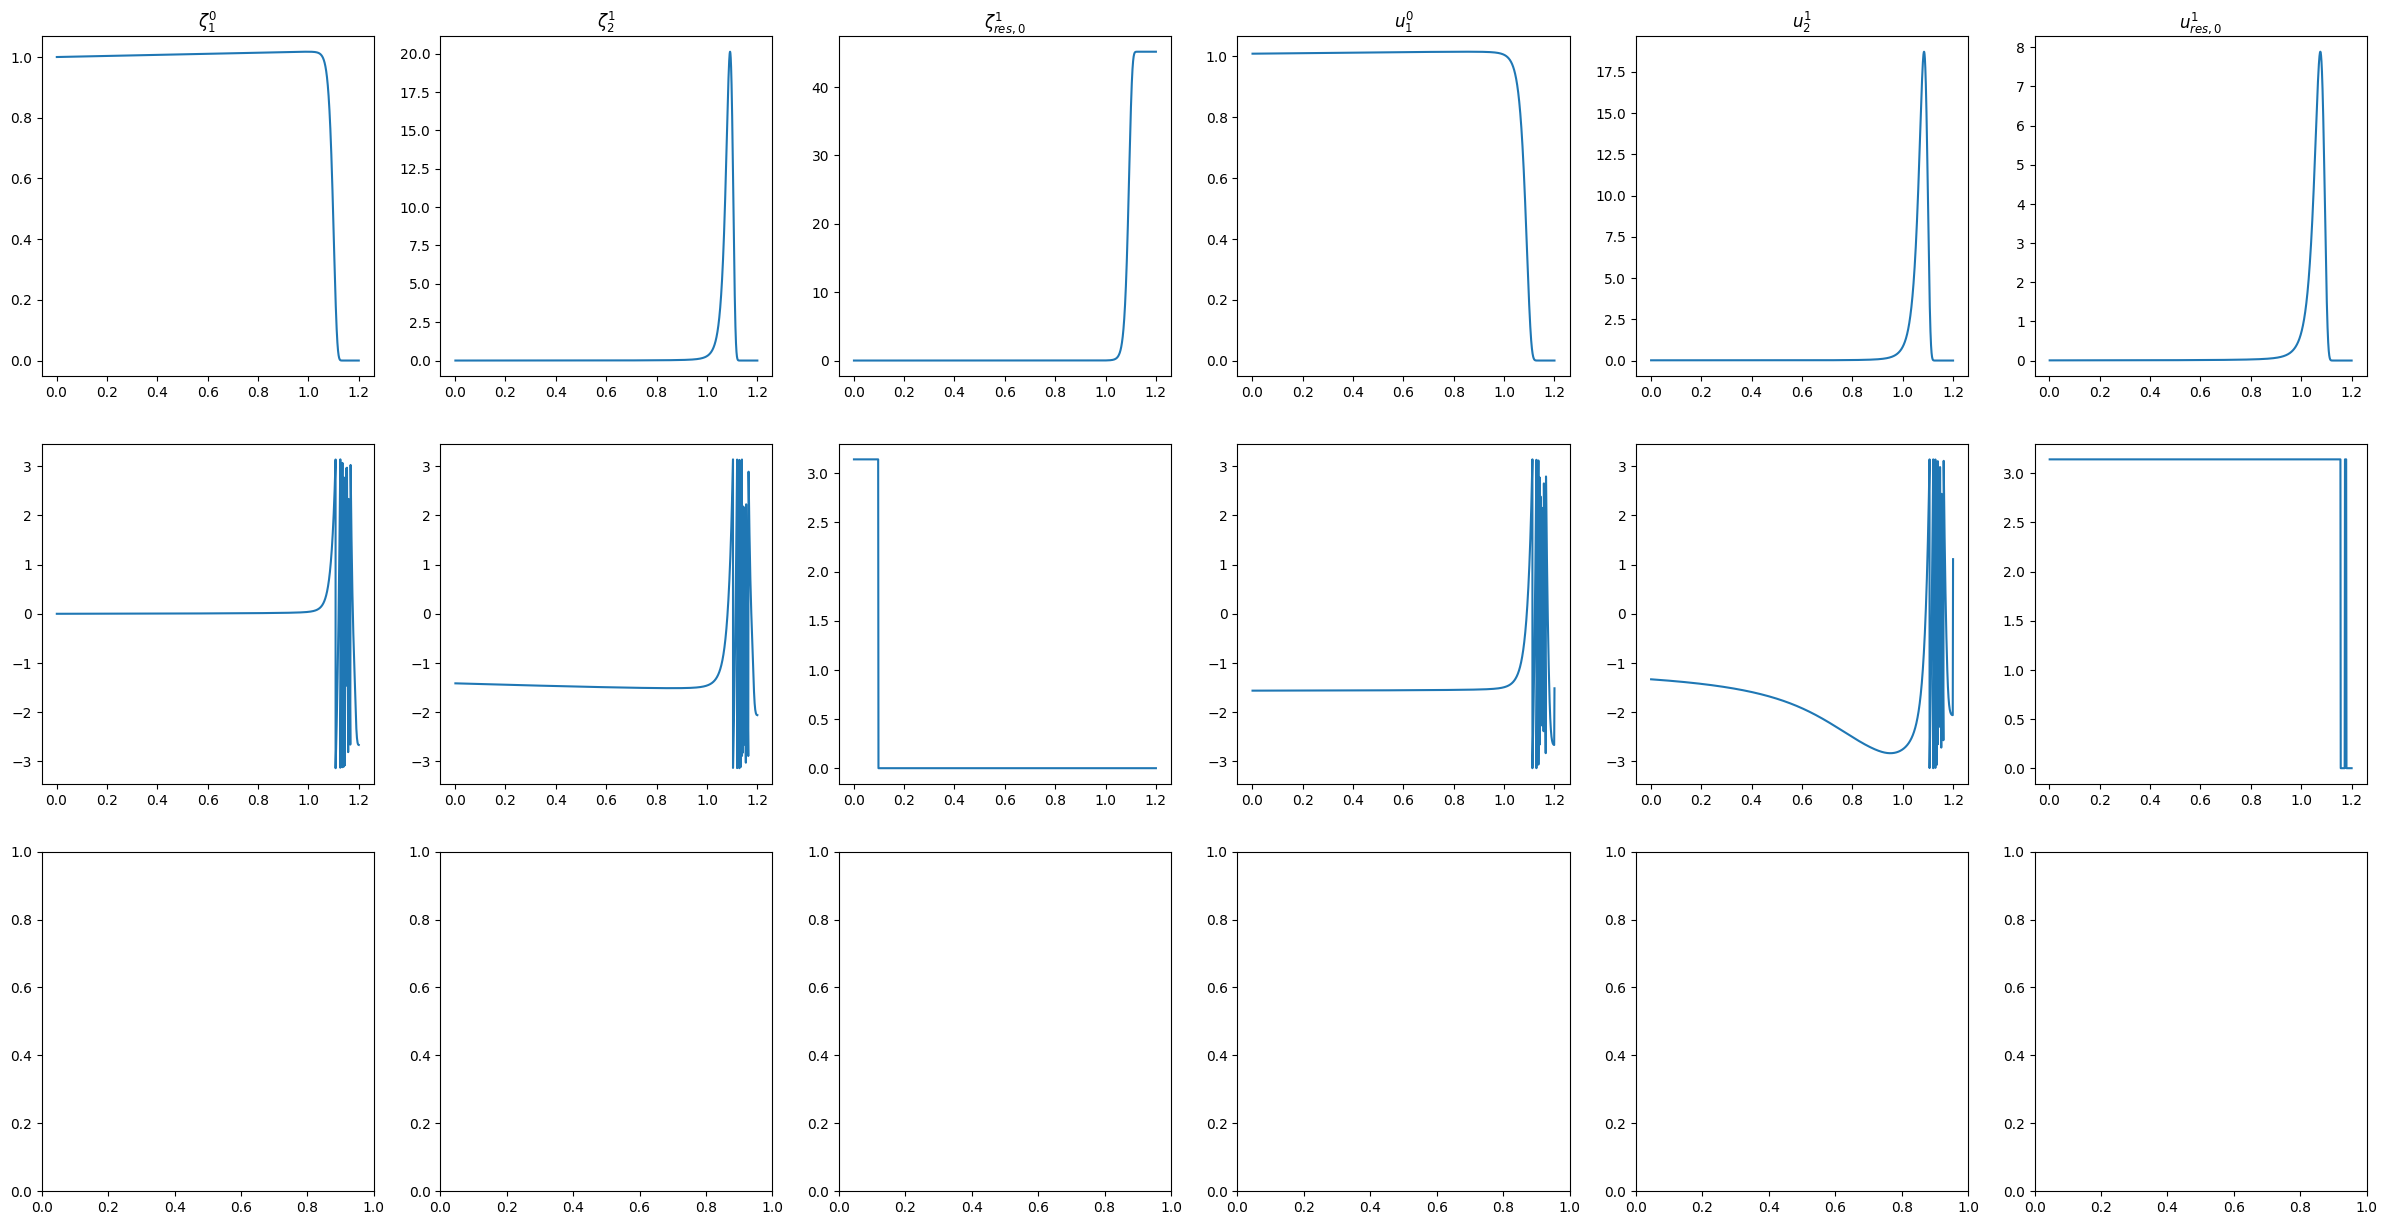

In [10]:

pdswe = PDSWE()
pdswe.H = 7.12
pdswe.A = 0.72
pdswe.L = 8e3
pdswe.r = 0.45

pdswe.tol = 1e-7


pdswe.a_r = 0.1
pdswe.dL = 0.2


factor = 0.9
factor = 1
h_fx = lambda x: factor*x
h_fx_dx = lambda x: factor
h_fx_dxx = lambda x: 0

pdswe.h_fx = h_fx
pdswe.h_fx_dx = h_fx_dx
pdswe.h_fx_dxx = h_fx_dxx


pdswe.set_derivative_vars()

pdswe.solve()

pdswe.visualize_components(0.9)
pdswe.visualize_amplitudes(0)

# Different dL

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          2.05e+02       1.02e+07         1000           1998      
       2          7.17e+03       5.64e-17         2998           2109      
       3          1.30e-01       1.44e-21         5107           1272      
       4          1.13e-05       1.88e-29         6379            714      
       5          3.68e-06       1.28e-27         7093            314      
       6          4.83e-07       1.94e-29         7407            10       
       7          1.00e-07       2.64e-32         7417             0       
Solved in 7 iterations, number of nodes 7417. 
Maximum relative residual: 1.00e-07 
Maximum boundary residual: 2.64e-32
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.11e+02       3.38e+06         1000           1998      
       2          1.15e+02       5.03e-24         2998            820      
       3          1.82e-04       8.22e-30   

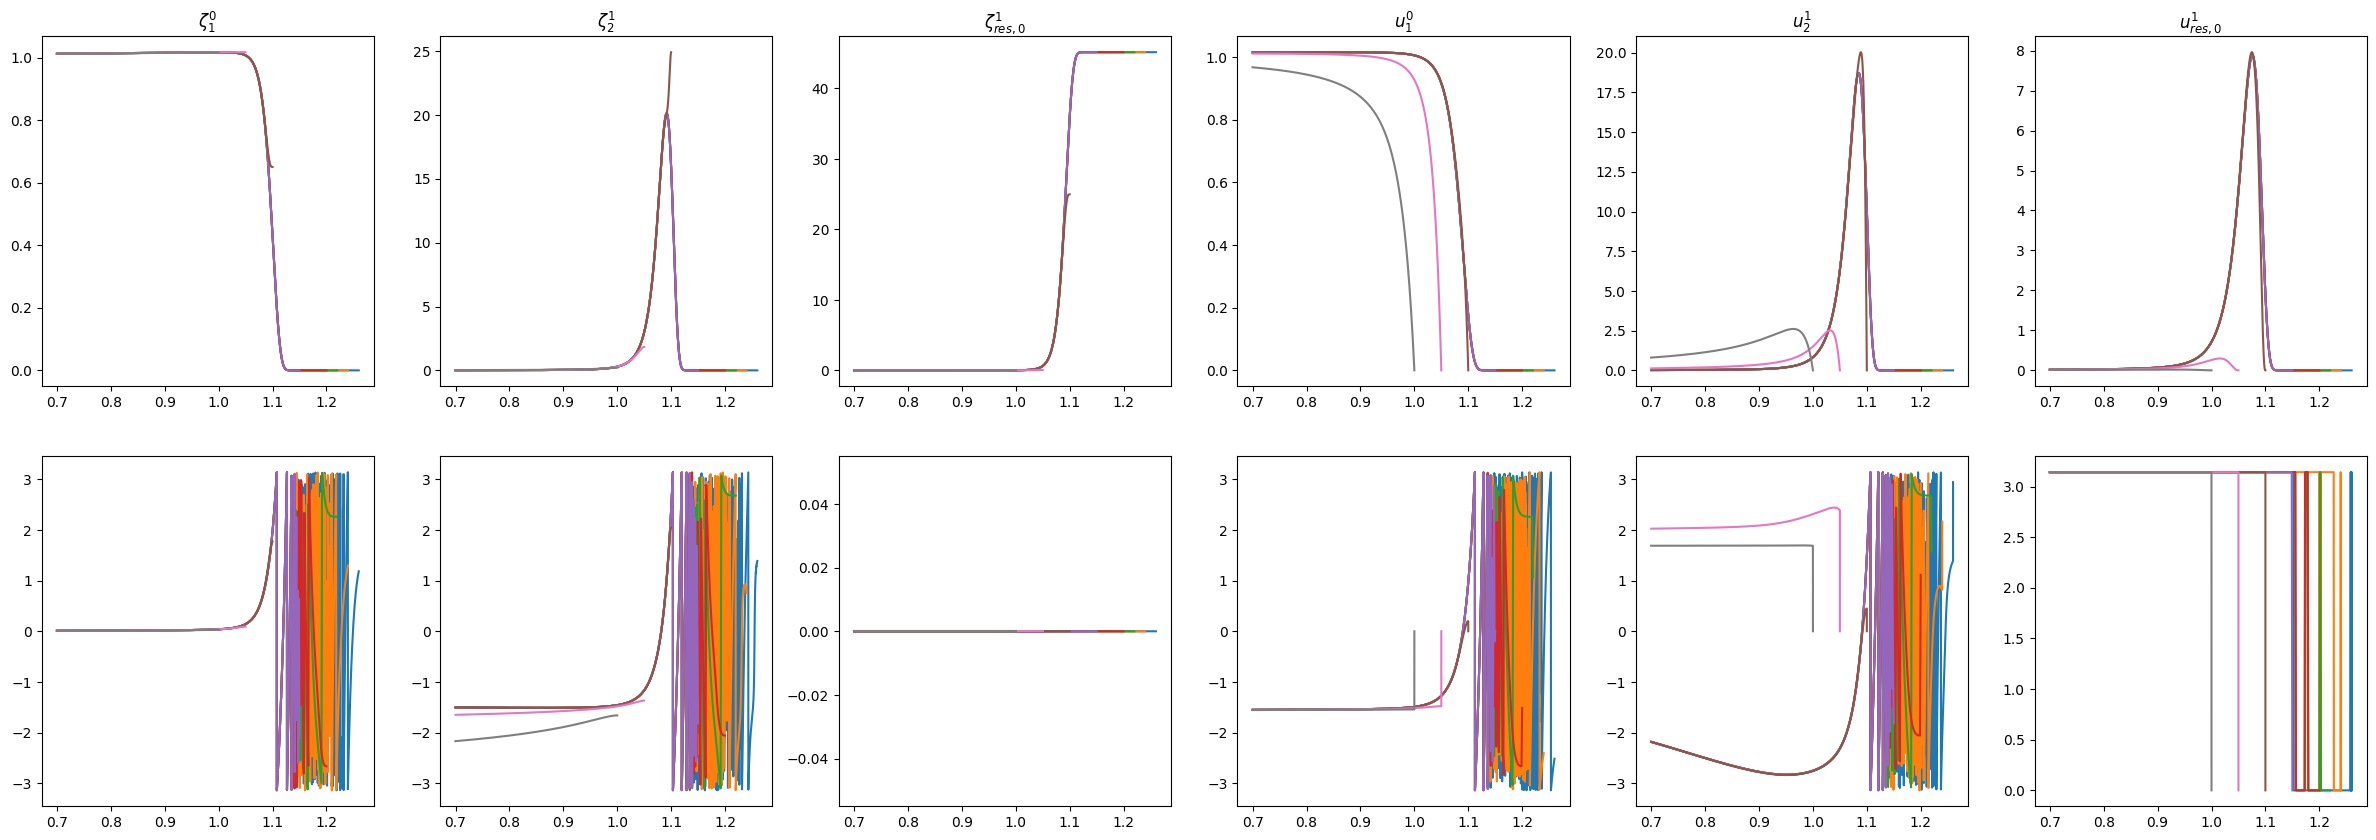

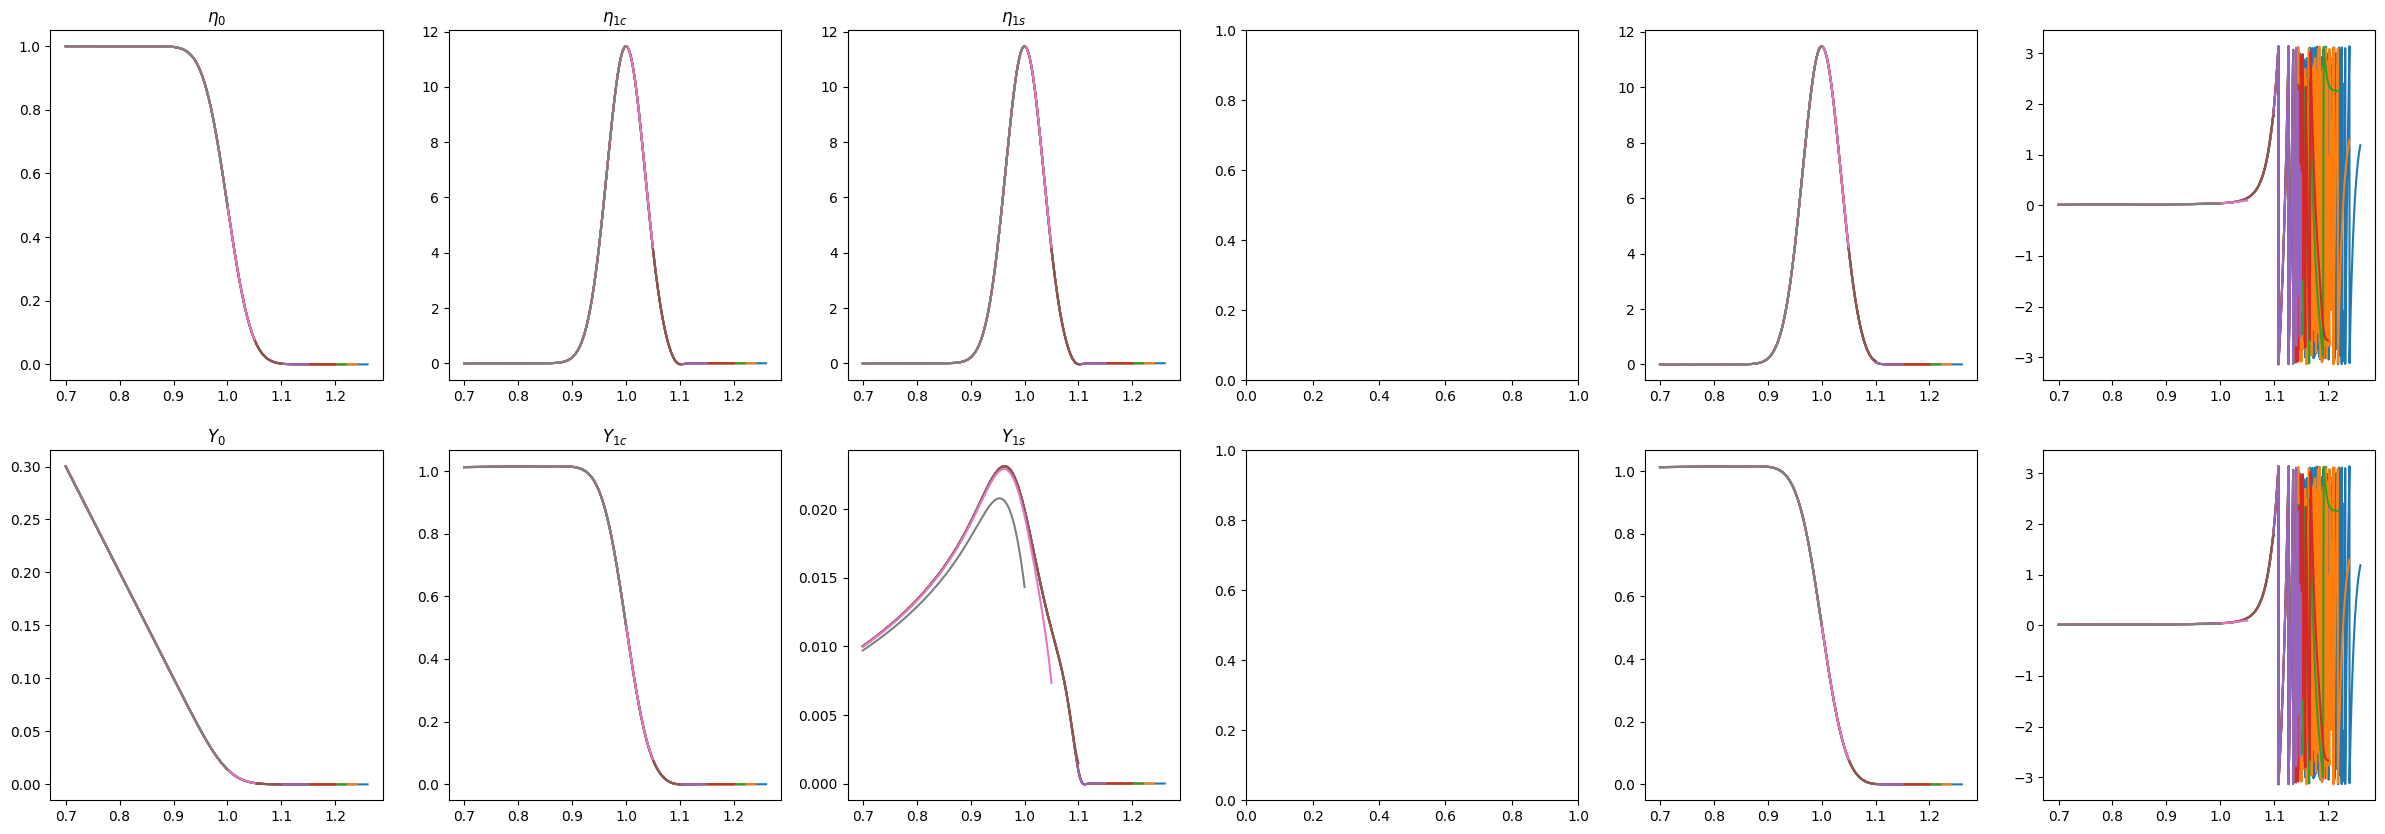

In [11]:
fig, axs = plt.subplots(2, 6, figsize=(30, 10))
fig2, axs2 = plt.subplots(2, 6, figsize=(30, 10))

# for dL in [0, 0.05, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26]:
# for dL in [0]:
# for dL in [0, 0.05, 0.08, 0.1, 0.12]:
# for dL in [0.2, 0.225, 0.25, 0.275, 0.3]:
# for dL in [0.2, 0.21, 0.22, 0.223, 0.225, 0.25, 0.26][::-1]:
for dL in [0, 0.05, 0.1, 0.15, 0.2, 0.22, 0.24, 0.26][::-1]:
# for dL in [0.26]:
    pdswe.dL = dL
    pdswe.set_derivative_vars()
    pdswe.solve()
    pdswe.visualize_amplitudes(0.7, axs=axs)
    pdswe.visualize_defina_vars(0.7, axs=axs2)
plt.show()



# Different steepness initial linear bed profiles

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          5.24e-06       1.09e-27         1000            105      
       2          7.08e-07       1.28e-28         1105            140      
       3          9.86e-08       2.88e-29         1245             0       
Solved in 3 iterations, number of nodes 1245. 
Maximum relative residual: 9.86e-08 
Maximum boundary residual: 2.88e-29
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          4.01e-04       4.22e-28         1000            135      
       2          1.75e-05       4.03e-27         1135            151      
       3          1.18e-06       4.21e-29         1286            106      
       4          1.51e-07       4.90e-30         1392            11       
       5          9.88e-08       1.11e-32         1403             0       
Solved in 5 iterations, number of nodes 1403. 
Maximum relative residual: 9.88e-08 
Maximum boundary residual: 1.11e-32


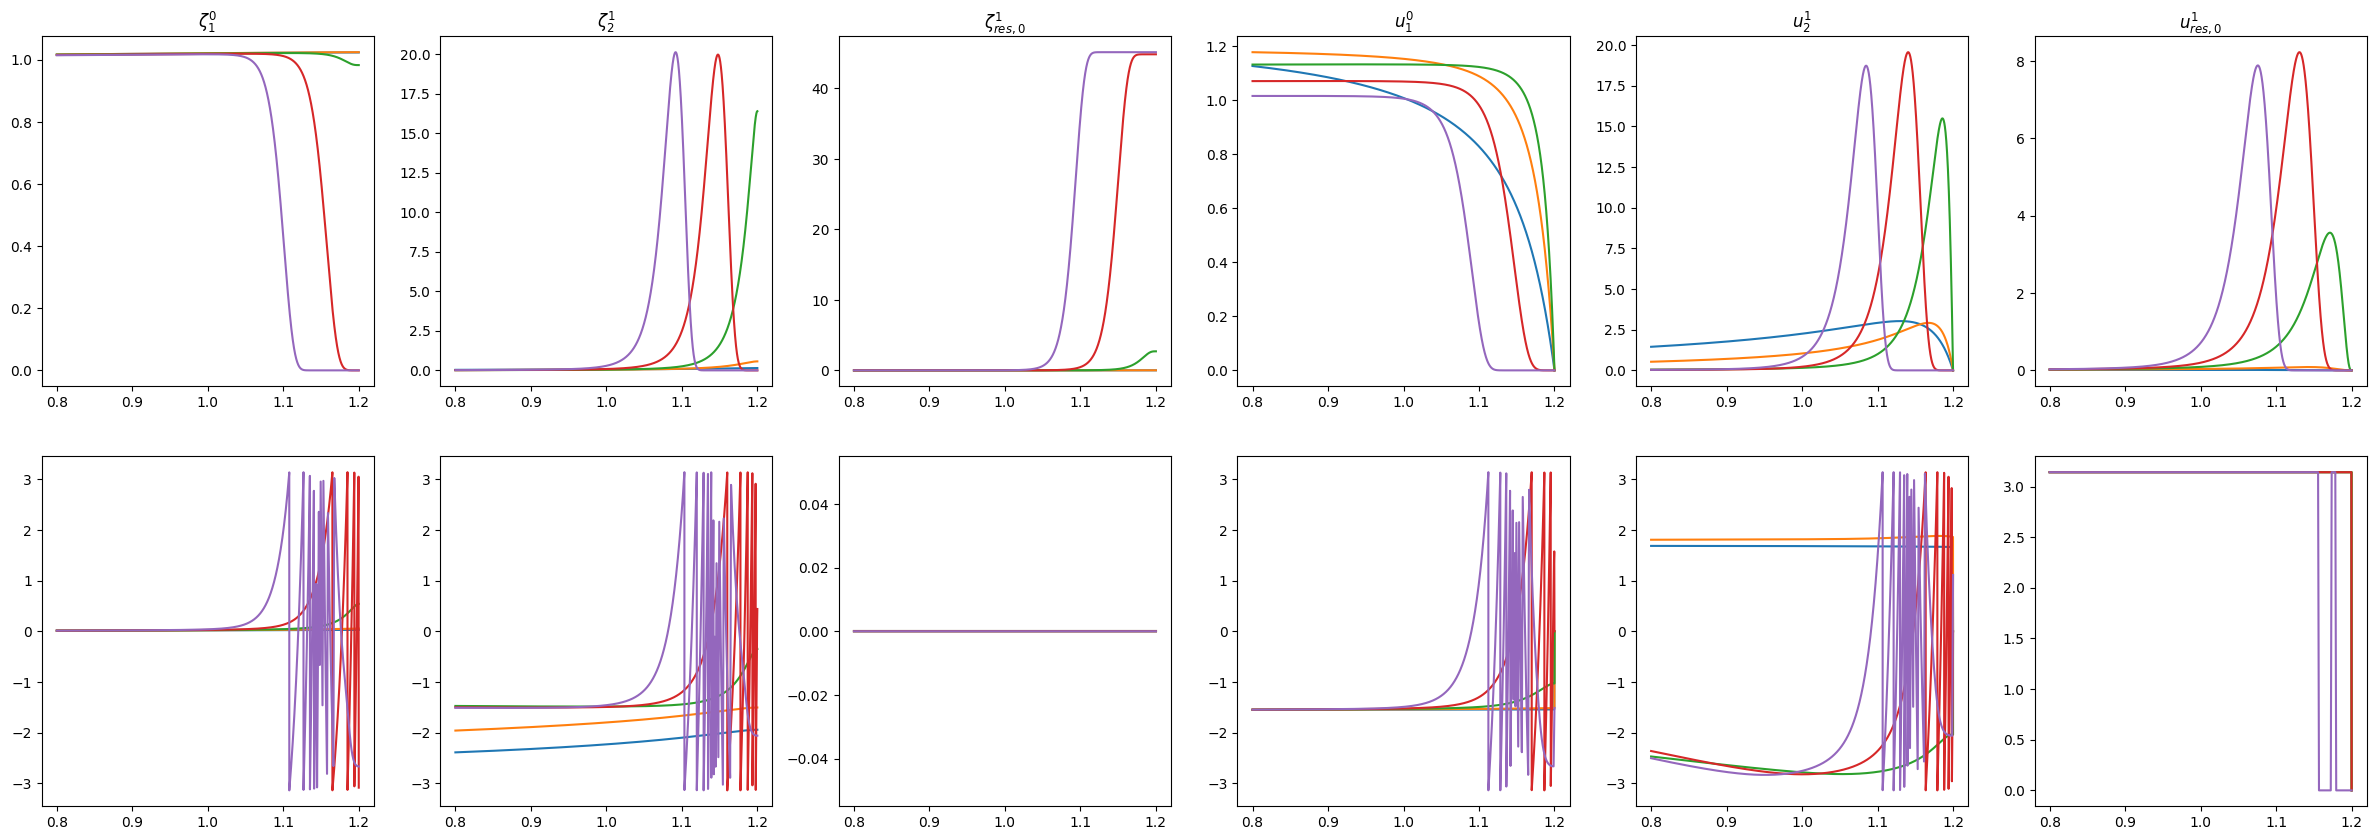

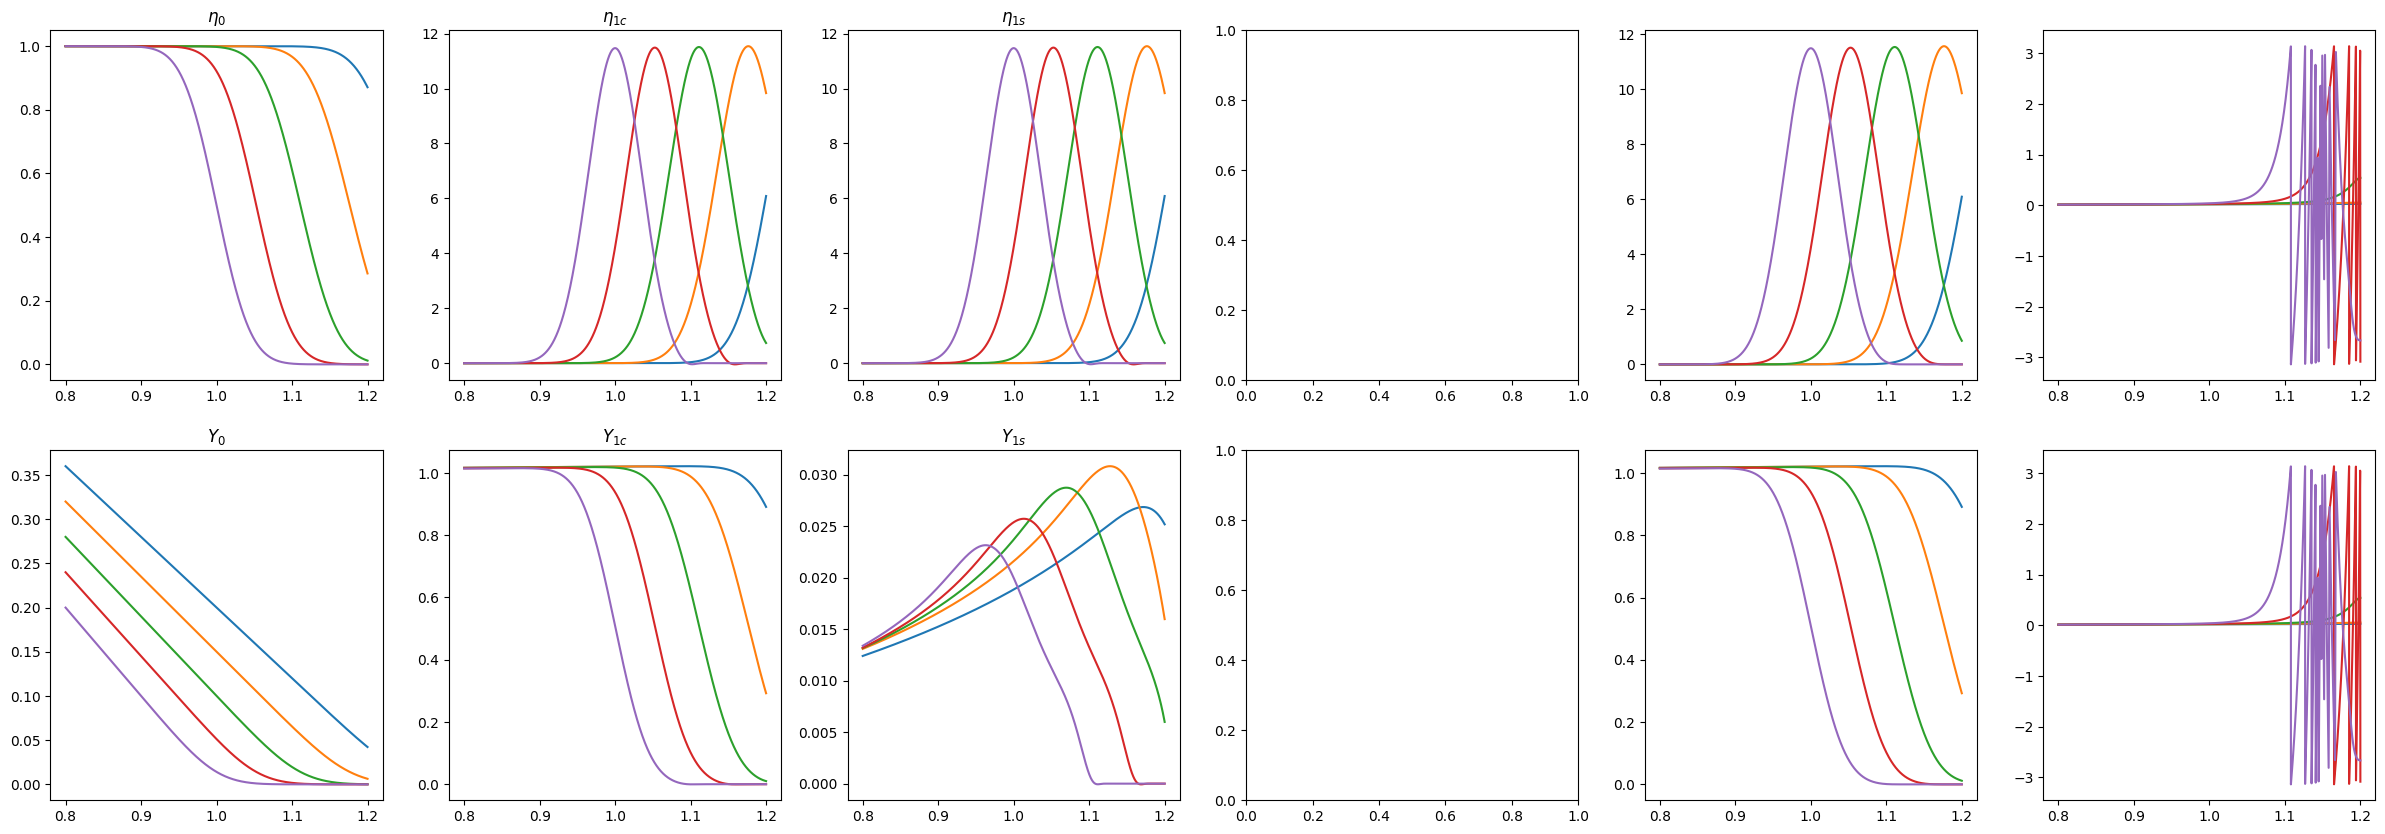

In [12]:
fig, axs = plt.subplots(2, 6, figsize=(30, 10))
fig2, axs2 = plt.subplots(2, 6, figsize=(30, 10))


pdswe.dL = 0.2
for f in [0.8, 0.85, 0.9, 0.95, 1]:

    factor = f
    h_fx = lambda x: factor*x
    h_fx_dx = lambda x: factor
    h_fx_dxx = lambda x: 0

    pdswe.set_derivative_vars()
    pdswe.solve()
    pdswe.visualize_amplitudes(0.8, axs=axs)
    pdswe.visualize_defina_vars(0.8, axs=axs2)
plt.show()


# Attempt to explain enormous increase in phase speed

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.69e-03       0.00e+00         1000            72       
       2          1.30e-04       0.00e+00         1072            80       
       3          1.73e-05       0.00e+00         1152            25       
       4          9.86e-06       0.00e+00         1177             0       
Solved in 4 iterations, number of nodes 1177. 
Maximum relative residual: 9.86e-06 
Maximum boundary residual: 0.00e+00
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          2.57e-03       0.00e+00         1000            64       
       2          1.33e-04       0.00e+00         1064            73       
       3          1.89e-05       0.00e+00         1137            26       
       4          9.91e-06       0.00e+00         1163             0       
Solved in 4 iterations, number of nodes 1163. 
Maximum relative residual: 9.91e-06 
Maximum boundary residual: 0.00e+00


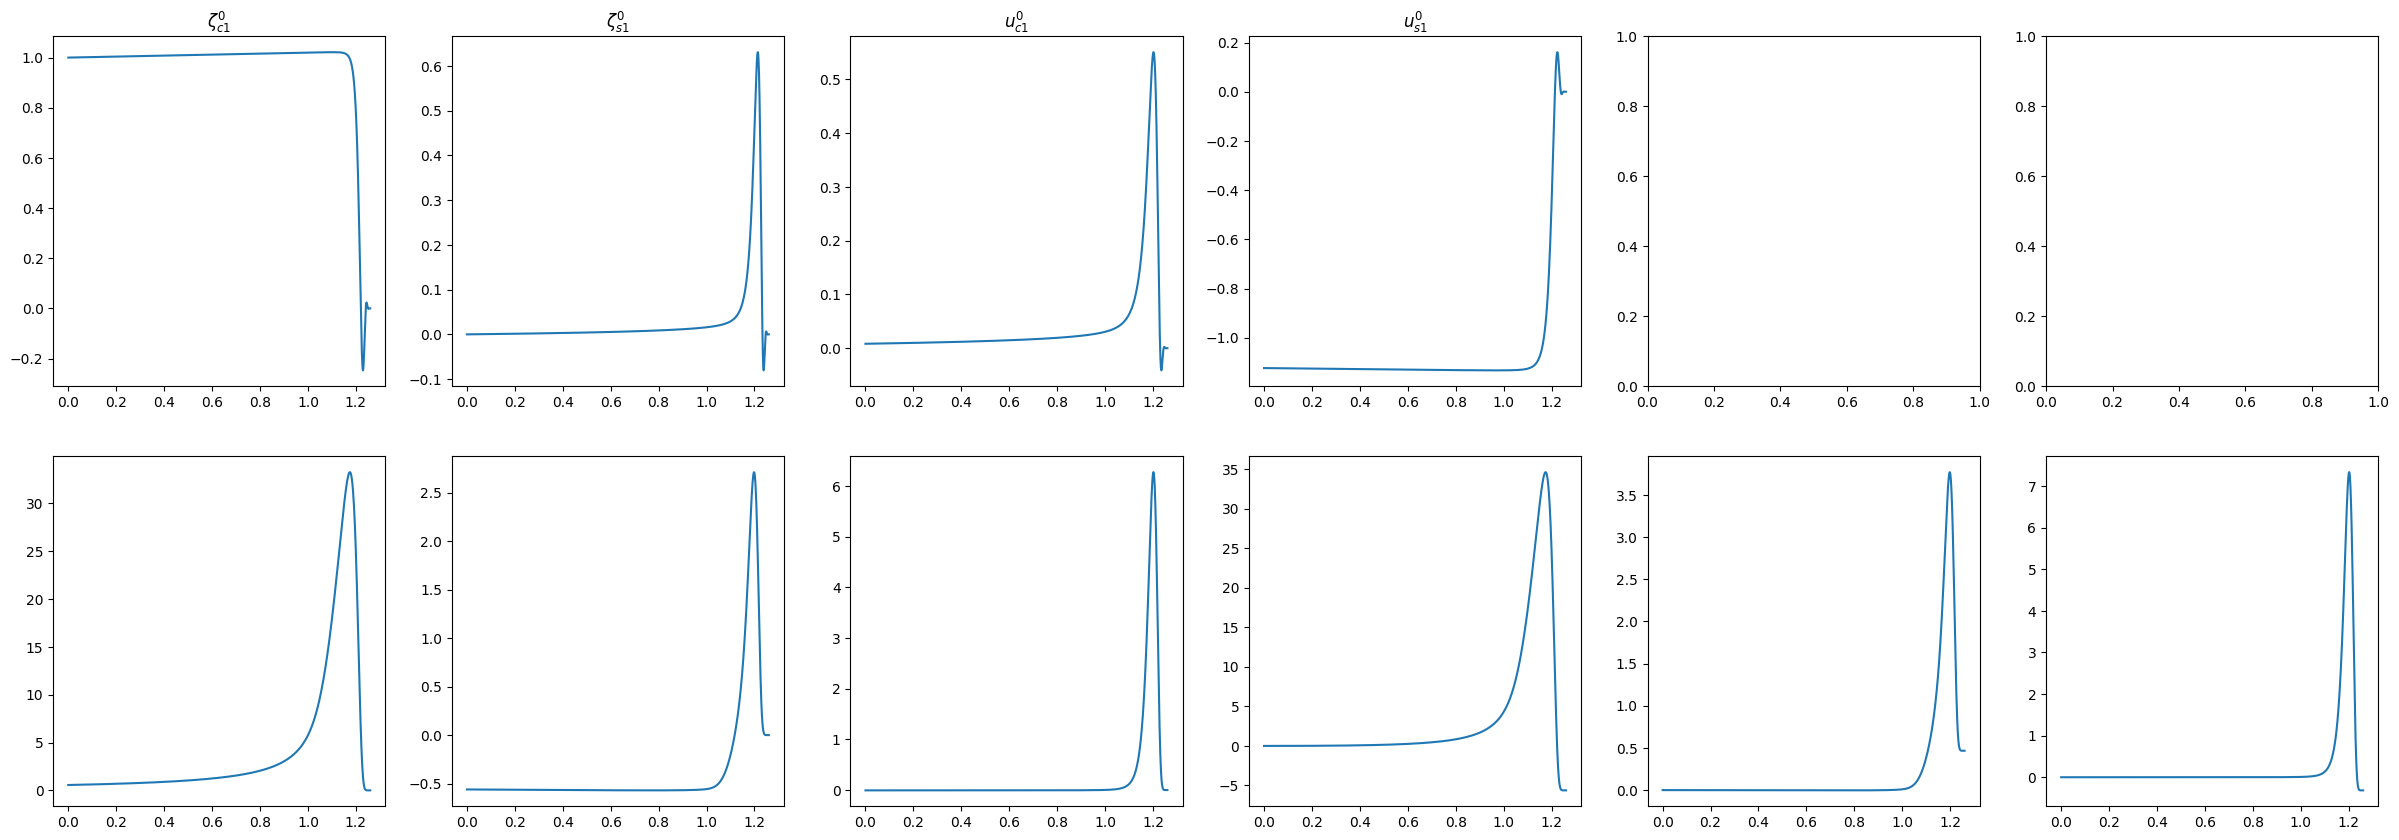

In [13]:
pdswe = PDSWE()
pdswe.H = 7.12
pdswe.A = 0.72
pdswe.L = 8e3
pdswe.r = 0.3

pdswe.tol = 1e-5

pdswe.a_r = 0.1
pdswe.dL = 0.15

pdswe.set_derivative_vars()
pdswe.solve_LO()


factor = 0.9
h_fx = lambda x: factor*x
h_fx_dx = lambda x: factor
h_fx_dxx = lambda x: 0

pdswe.h_fx = h_fx
pdswe.h_fx_dx = h_fx_dx
pdswe.h_fx_dxx = h_fx_dxx



fig, axs = plt.subplots(2, 6, figsize=(30, 10))
labels=[r"$\zeta^0_{c1}$", r"$\zeta^0_{s1}$", r"$u^0_{c1}$", r"$u^0_{s1}$", r"$\zeta^1_{r}$", r"$\zeta^1_{c2}$", r"$\zeta^1_{s2}$", r"$u^1_{r}$", r"$u^1_{c2}$", r"$u^1_{s2}$"]

pdswe.dL = 0.26

pdswe.set_derivative_vars()
pdswe.solve_LO()


for i in range(4):
    axs[0, i].set_title(labels[i])
    axs[0, i].plot(pdswe.y.x, pdswe.y.y[i])




lala = pdswe.visualize_LO_effects()
for i in range(3):
    axs[1, i].plot(pdswe.y.x, lala[i])

from scipy.integrate import cumulative_trapezoid as cumtrapz

for i in range(3):
    axs[1, 3+i].plot(pdswe.y.x, cumtrapz(pdswe.y.x, lala[i], initial=0))


plt.show()



In [14]:

A = Y0_x * eta0_x
B = 2 * Y0_x_dx * eta0_x - Y0_x * eta0_x_dx
C = np.gradient(Y0_x_dx, x) * eta0_x - Y0_x_dx * eta0_x_dx
D = - eta0_x**2 * pdswe.r / pdswe.kappa / Y0_x
E = - eta0_x**2 / pdswe.kappa

F = C + D + E

fig, axs = plt.subplots(2, 6, figsize=(30, 10))

axs[0, 0].plot(x, A)
axs[0, 1].plot(x, B)
axs[0, 2].plot(x, C)
axs[0, 3].plot(x, D)
axs[0, 4].plot(x, E)
axs[0, 5].plot(x, F)



# celerity
k = - 1j * B + np.sqrt(-B**2 + 4 * A * F + 0j) / (- 2 * A)
k2 = - 1j * B - np.sqrt(-B**2 + 4 * A * F + 0j) / (- 2 * A)



# axs[1, 0].plot(x, -B**2 + 4 * A * F)
axs[1, 0].plot(x, np.real(k))
axs[1, 1].plot(x, np.imag(k))
axs[1, 2].plot(x, np.real(k2))
axs[1, 3].plot(x, np.imag(k2))



plt.show()


NameError: name 'Y0_x' is not defined